In [3]:
# Import Data Manipulation from
import numpy as np
import pandas as pd     

# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import Filter Data Warnings

import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'Model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

In [4]:
# Load the dataset

url  = 'https://raw.githubusercontent.com/adnansayyedd/CementCompositeStrength_Predicition-Model/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3,9.69
853,318.0,0.0,126.0,210.0,6.0,861.0,737.0,28,40.06
353,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,100,59.30
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
490,387.0,20.0,94.0,157.0,11.6,938.0,845.0,3,34.77
...,...,...,...,...,...,...,...,...,...
234,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,3,13.18
328,252.3,0.0,98.8,146.3,14.2,987.8,889.0,100,60.95
845,321.0,164.0,0.0,190.0,5.0,870.0,774.0,28,57.21
832,147.0,115.0,89.0,202.0,9.0,860.0,829.0,28,19.99


In [39]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict ({
        'feature': i,
        'unique_values': df[i].nunique(),
        'Missing_values': df[i].isnull().sum(),
        'Min': df[i].min(),
        '25%': df[i].quantile(0.25),
        'Median': df[i].median(),
        'Max': df[i].max(), 
        'Mean': df[i].mean(),
        'mode' : df[i].mode()[0],
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),

        })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['unique_values', 'Missing_values', 'Min', '25%', 'Median', 'Max', 'Mean', 'mode', 'Standard Deviation', 'Variance', 'Skewness','Kurtosis','IQR'], cmap='coolwarm')

,feature,unique_values,Missing_values,Min,25%,Median,Max,Mean,mode,Standard Deviation,Variance,Skewness,Kurtosis,IQR
0,cement,278,0,102.000000,192.375000,272.900000,540.000000,281.167864,362.600000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,185,0,0.000000,0.000000,22.000000,359.400000,73.895825,0.000000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,156,0,0.000000,0.000000,0.000000,200.100000,54.188350,0.000000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,195,0,121.800000,164.900000,185.000000,247.000000,181.567282,192.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,111,0,0.000000,0.000000,6.400000,32.200000,6.204660,0.000000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,284,0,801.000000,932.000000,968.000000,1145.000000,972.918932,932.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,302,0,594.000000,730.950000,779.500000,992.600000,773.580485,594.000000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,14,0,1.000000,7.000000,28.000000,365.000000,45.662136,28.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,845,0,2.330000,23.710000,34.445000,82.600000,35.817961,33.400000,16.705742,279.081814,0.416977,-0.313725,22.425000


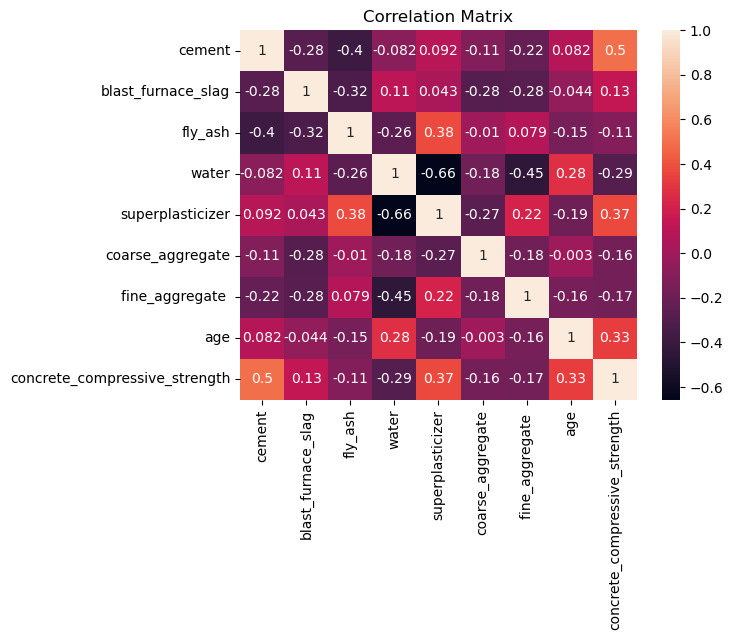

In [51]:
# Checking Correlation matrix
# X = Independent Variables
# y = Dependent Variable ----> ['concrete_compressive_strength']

sns.heatmap(df.corr(), annot=True,yticklabels=True)
plt.title('Correlation Matrix')
plt.show()